In [7]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics 

In [9]:
#a
train_path = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
train = pd.read_csv(train_path, delimiter = ',')
test_path = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
test = pd.read_csv(test_path, delimiter = ',')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 1.3 MB


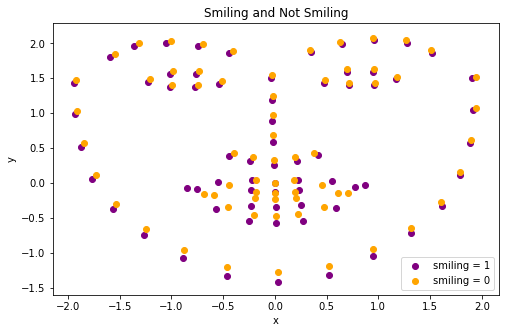

In [4]:
#b
train_data = train.loc[:,:].values
ysize = len(train_data[:,0]) #4800
xsize = len(train_data[0,:]) #137
smiling1 = train_data[train_data[:,xsize-1]==1]
smiling0 = train_data[train_data[:,xsize-1]==0]
smiling1 = np.delete(smiling1, xsize-1, axis=1)
smiling0 = np.delete(smiling0, xsize-1, axis=1)
a1 = np.mean(smiling1, axis=0)
a0 = np.mean(smiling0, axis=0)
x1,y1,x0,y0 = [],[],[],[]
for i in range(0,len(a1),2):
    x1 = np.append(x1, a1[i])
    y1 = np.append(y1, a1[i+1])
    x0 = np.append(x0, a0[i])
    y0 = np.append(y0, a0[i+1])
plt.figure(figsize=(8,5))    
plt.scatter(x1, y1, color="purple", label='smiling = 1')  
plt.scatter(x0, y0, color="orange", label='smiling = 0') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.title("Smiling and Not Smiling")
plt.show()    

In [5]:
#e
#max_depth=2
x_train = train.drop('smiling', axis=1)
x_test = test.drop('smiling', axis=1)
y_train = train.smiling
y_test = test.smiling
clf = DecisionTreeClassifier(max_depth=2, random_state=2001)
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
train_accuracy1 = metrics.accuracy_score(y_train, y_train_pred)
y_test_pred = clf.predict(x_test)
test_accuracy1 = metrics.accuracy_score(y_test, y_test_pred)
print("Maximum depth = 2: Training Accuracy: {0:.2f}%,".format(train_accuracy1 * 100), "Test Accuracy: {0:.2f}%".format(test_accuracy1 * 100))

#max_depth=8
clf8 = DecisionTreeClassifier(max_depth=8, random_state=2001)
clf8.fit(x_train, y_train)
y_train_pred = clf8.predict(x_train)
train_accuracy2 = metrics.accuracy_score(y_train, y_train_pred)
y_test_pred = clf8.predict(x_test)
test_accuracy2 = metrics.accuracy_score(y_test, y_test_pred)
print("Maximum depth = 8: " "Training Accuracy: {0:.2f}%,".format(train_accuracy2 * 100), "Test Accuracy: {0:.2f}%".format(test_accuracy2 * 100))

#max_depth=20
clf = DecisionTreeClassifier(max_depth=20, random_state=2001)
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
train_accuracy3 = metrics.accuracy_score(y_train, y_train_pred)
y_test_pred = clf.predict(x_test)
test_accuracy3 = metrics.accuracy_score(y_test, y_test_pred)
print("Maximum depth = 20: " "Training Accuracy: {0:.2f}%,".format(train_accuracy3 * 100), "Test Accuracy: {0:.2f}%".format(test_accuracy3 * 100))


Maximum depth = 2: Training Accuracy: 79.48%, Test Accuracy: 78.17%
Maximum depth = 8: Training Accuracy: 93.35%, Test Accuracy: 84.08%
Maximum depth = 20: Training Accuracy: 100.00%, Test Accuracy: 81.58%


In [6]:
#f
sorted(list(zip(clf8.feature_importances_, train.columns)), reverse=True)[:3]

[(0.33040484928175073, 'x50'),
 (0.08995881431599788, 'y48'),
 (0.08831447209293988, 'y29')]